# Hierarchical Clustering Using Scipy
In this notebook, we will be using Scipy to make dendograms. The notebook gives the basic steps to realise a dendrogram from a numeric matrix. Let’s describe a few customisation that you can easily apply to your dendrogram based on the car dataset which contains different attributes like model, mpg, gear and other features related to cars.


## 1. Making a simple Dendogram


### Importing libraries


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np

### Importing Data Set

In [3]:
df = pd.read_csv('/content/mtcars.csv')

In [4]:
df = df.set_index('model')

**Agglomerative Clustering** has different types like *WARD*,  *COMPLETE-LINK* and *AVERAGE*. We however will be using *WARD* clustering in this example.
Agglomerative clustering starts with each data point as its own individual cluster, and iteratively merges the closest clusters until all points are part of a single cluster or a stopping criterion is met (such as a specific number of clusters).


Single Linkage (Minimum Linkage):

Distance between two clusters is defined as the shortest distance between any single point in the first cluster and any single point in the second cluster.

Complete Linkage (Maximum Linkage):

Distance between two clusters is the maximum distance between any point in the first cluster and any point in the second cluster.

Average Linkage:

The distance between two clusters is the average of the distances between all pairs of points (one point from each cluster).

Ward's Linkage:

Minimizes the variance within each cluster. The distance between clusters is based on the increase in variance that would result from merging them.

In [5]:
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')

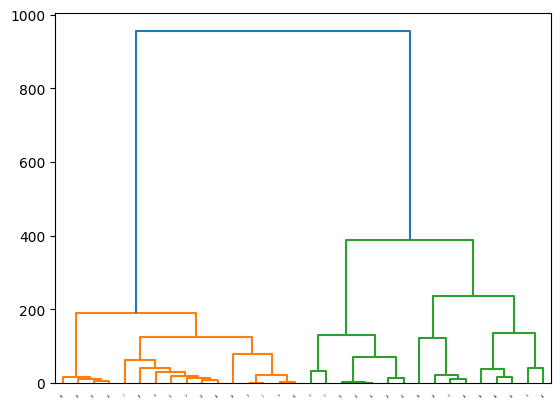

In [6]:
hierarchy.dendrogram(Z, leaf_font_size=2)
plt.show()

Above figure shows a simple dendogram without proper labels shown. Let us explore further and see how customizations can be made to improve the plot.

## 2. Adding leaf labels

In [7]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
Z = hierarchy.linkage(df, 'ward')

**Task 1:** Make a dendogram for improving the leaf rotation, font size of labels. Keep in mind the following:

- leaf_rotation = 90
- leaf_font_size= 10
- labels=df.index

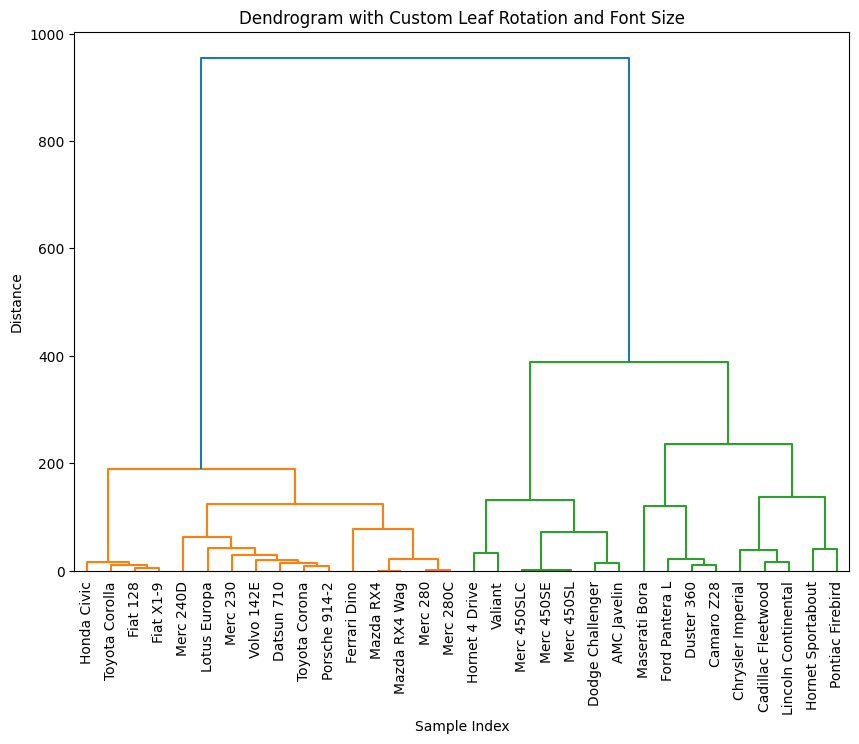

In [9]:


import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix for hierarchical clustering using 'ward' method
Z = linkage(df, method='ward')

# Plot the dendrogram with custom leaf rotation and font size
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=10, labels=df.index)
plt.title("Dendrogram with Custom Leaf Rotation and Font Size")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()



The above plot shows labels and names of different models, those which are adjusted to get a better understanding of the dendogram. We can further improve the visualization by changing the orientation of these labels.

## 3. Orientation

**Task 2:**: Fix the orientation of dendogram above by putting the orientation = "left". Please note that the lable font size should be 10

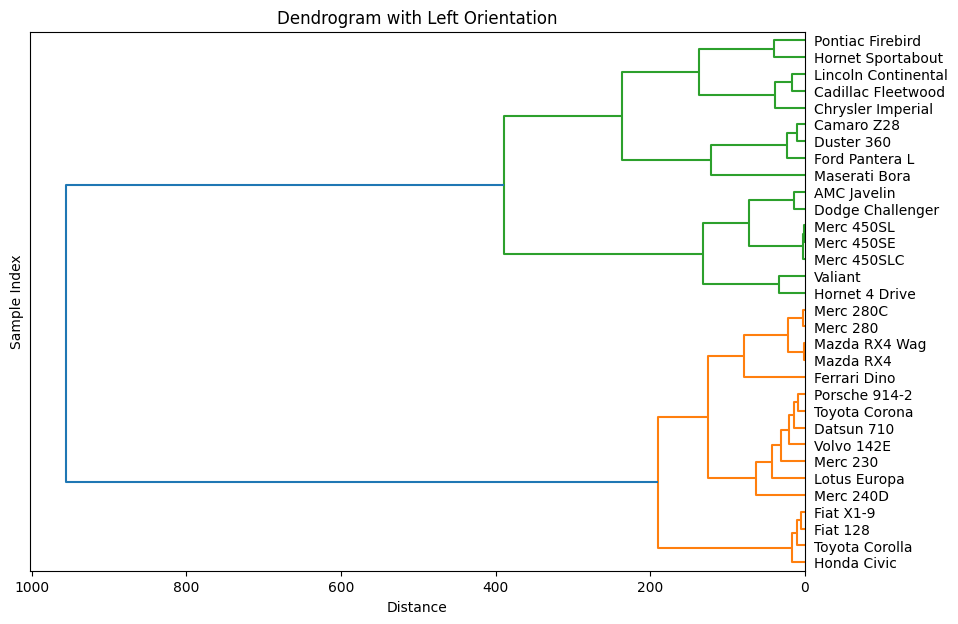

In [10]:
# Orientation of the dendrogram

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix for hierarchical clustering using 'ward' method
Z = linkage(df, method='ward')

# Plot the dendrogram with custom orientation ("left") and font size
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=0, leaf_font_size=10, labels=df.index, orientation="left")
plt.title("Dendrogram with Left Orientation")
plt.xlabel("Distance")
plt.ylabel("Sample Index")
plt.show()


The plot above shows how the orientation of the plot and labels can be changed. The orientation in the plot above has been made to right and can also be set to left.

## 4. Number of clusters

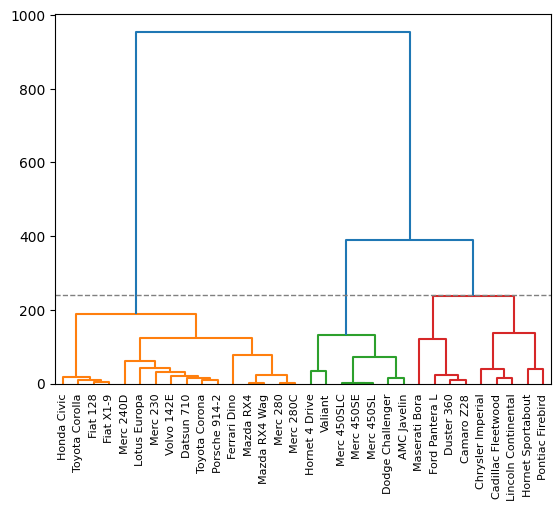

In [11]:
# Control number of clusters in the plot + add horizontal line.
hierarchy.dendrogram(Z, color_threshold=240,labels=df.index,leaf_rotation=90)
plt.axhline(y=240, c='grey', lw=1, linestyle='dashed')

A horizontal shows the threshold from where the clusters can be identified. Currently there are 3 clusters shown. Changing the threshold would result in different number of clusters.

# Hierarchical Clustering using SKLearn

We have a csv file that contains all the votes from the 114th Senate.  Each row contains the votes of an individual senator. Votes are coded as 0 for “No”, 1 for “Yes”, and 0.5 for “Abstain”. There are different columns having the bills, the party, and the state of each senator. Lets see how clustering will be applied on this data set.

## 1. Clustering
Let's now use sklearn's ```AgglomerativeClustering``` to conduct the heirarchical clustering

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
data=pd.read_csv('/content/114_congress.csv')
df_senate= data.copy()

In [14]:
df_senate.shape

(100, 18)

In [15]:
df_senate.head()

,name,party,state,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [16]:
df_senate.dtypes

,0
name,object
party,object
state,object
Bill_1,float64
Bill_4,float64
Bill_5,float64
Bill_6,float64
Bill_7,float64
Bill_8,float64
Bill_9,float64


In [17]:
df_senate.set_index('name',inplace=True)

In [18]:
df_senate.head()

,party,state,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
name,,,,,,,,,,,,,,,,,
Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [25]:
X=df_senate.drop(['party','state'], axis = 1)

In [26]:
X.head()

,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
name,,,,,,,,,,,,,,,
Alexander,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Ayotte,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Baldwin,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Barrasso,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Bennet,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [19]:
Y=df_senate['party']

In [20]:
Y.head()

,party
name,
Alexander,R
Ayotte,R
Baldwin,D
Barrasso,R
Bennet,D


Let's also try complete and average linkages

**Task 3**:
* Conduct hierarchical clustering with complete linkage, store the predicted labels in the variable ```complete_pred```
* Conduct hierarchical clustering with average linkage, store the predicted labels in the variable ```avg_pred```

In [28]:
import pandas as pd

# Check which columns contain non-numeric data
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns: ", non_numeric_cols)

df_cleaned = df.drop(non_numeric_cols, axis=1)

X = df_cleaned.to_numpy()

from sklearn.cluster import AgglomerativeClustering

# 1. Complete Linkage
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_pred = complete_clustering.fit_predict(X)

# 2. Average Linkage
average_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
avg_pred = average_clustering.fit_predict(X)

# Display the predicted labels for both methods
complete_pred, avg_pred


Non-numeric columns:  Index([], dtype='object')


(array([1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2,
        2, 0, 0, 1, 1, 1, 0, 1, 0, 1]),
 array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 2, 1]))

To determine which clustering result better matches the original labels of the samples, we can use ```adjusted_rand_score``` which is an *external cluster validation index* which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

Cluster validation indices are discussed later in the course.

**Task 4**:
* Calculate the Adjusted Rand score of the clusters resulting from complete linkage and average linkage

In [32]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering

# Assuming X is your dataset (should have the same number of samples as the labels)
# 1. Perform Ward's Agglomerative Clustering
ward_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward_pred = ward_clustering.fit_predict(X)

# 2. Define Y (ground truth labels)
# Y must have the same length as the number of samples in X
Y = [0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2]
# Ensure Y has 32 labels if X has 32 samples

# 3. Calculate Adjusted Rand Score
ward_ar_score = adjusted_rand_score(Y, ward_pred)

# Print the Adjusted Rand Score
print("Ward's Agglomerative Clustering Adjusted Rand Score:", ward_ar_score)


Ward's Agglomerative Clustering Adjusted Rand Score: -0.03896103896103896


In [34]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering

Y = [0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2]

# 1. Perform Complete Linkage Clustering
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_pred = complete_clustering.fit_predict(X)

# 2. Perform Average Linkage Clustering
average_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
avg_pred = average_clustering.fit_predict(X)

# Write the code to calculate the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(Y, complete_pred)

# Write the code to calculate the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(Y, avg_pred)

# Print the adjusted Rand scores
print("Complete Linkage Adjusted Rand Score:", complete_ar_score)
print("Average Linkage Adjusted Rand Score:", avg_ar_score)


Complete Linkage Adjusted Rand Score: -0.03896103896103896
Average Linkage Adjusted Rand Score: -0.03603133159268929


Which algorithm results in the higher Adjusted Rand Score?

In [35]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: -0.03896103896103896 
Complete:  -0.03896103896103896 
Average:  -0.03603133159268929


In [36]:
complete_pred

array([1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2,
       2, 0, 0, 1, 1, 1, 0, 1, 0, 1])

## 3. Dendrogram visualization with scipy

Let's visualize the highest scoring clustering result.

To do that, we'll need to use Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function to perform the clusteirng again so we can obtain the linkage matrix it will later use to visualize the hierarchy

**Task 5:** Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values. Pick the one that resulted in the highest Adjusted Rand Score

In [39]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering

# Assuming X is the dataset and Y is the ground truth labels
# Define ground truth labels (Example)
Y = [0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2]

# Define the linkage types to test
linkage_types = ['ward', 'complete', 'average', 'single']

# Initialize a variable to store the highest ARI score and corresponding linkage type
best_linkage = None
best_ari_score = -1

# Iterate over the different linkage types and calculate ARI for each
for linkage in linkage_types:
    # Perform Agglomerative Clustering with the current linkage
    clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    pred_labels = clustering.fit_predict(X)

    # Calculate the Adjusted Rand Score
    ari_score = adjusted_rand_score(Y, pred_labels)

    # Print the ARI score for the current linkage
    print(f"Linkage: {linkage}, Adjusted Rand Score: {ari_score}")

    # Check if this linkage gives the best ARI score so far
    if ari_score > best_ari_score:
        best_ari_score = ari_score
        best_linkage = linkage

# Output the linkage type with the highest ARI score
print(f"\nBest Linkage Type: {best_linkage}, with Adjusted Rand Score: {best_ari_score}")


Linkage: ward, Adjusted Rand Score: -0.03896103896103896
Linkage: complete, Adjusted Rand Score: -0.03896103896103896
Linkage: average, Adjusted Rand Score: -0.03603133159268929
Linkage: single, Adjusted Rand Score: 0.00629458665547629

Best Linkage Type: single, with Adjusted Rand Score: 0.00629458665547629


**Task 6:**

Plot a dendogram using scipy's [dendrogram()](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function

- leaf_font_size=10
- labels=X.index
- orientation="right"
- figsize=(15,18)

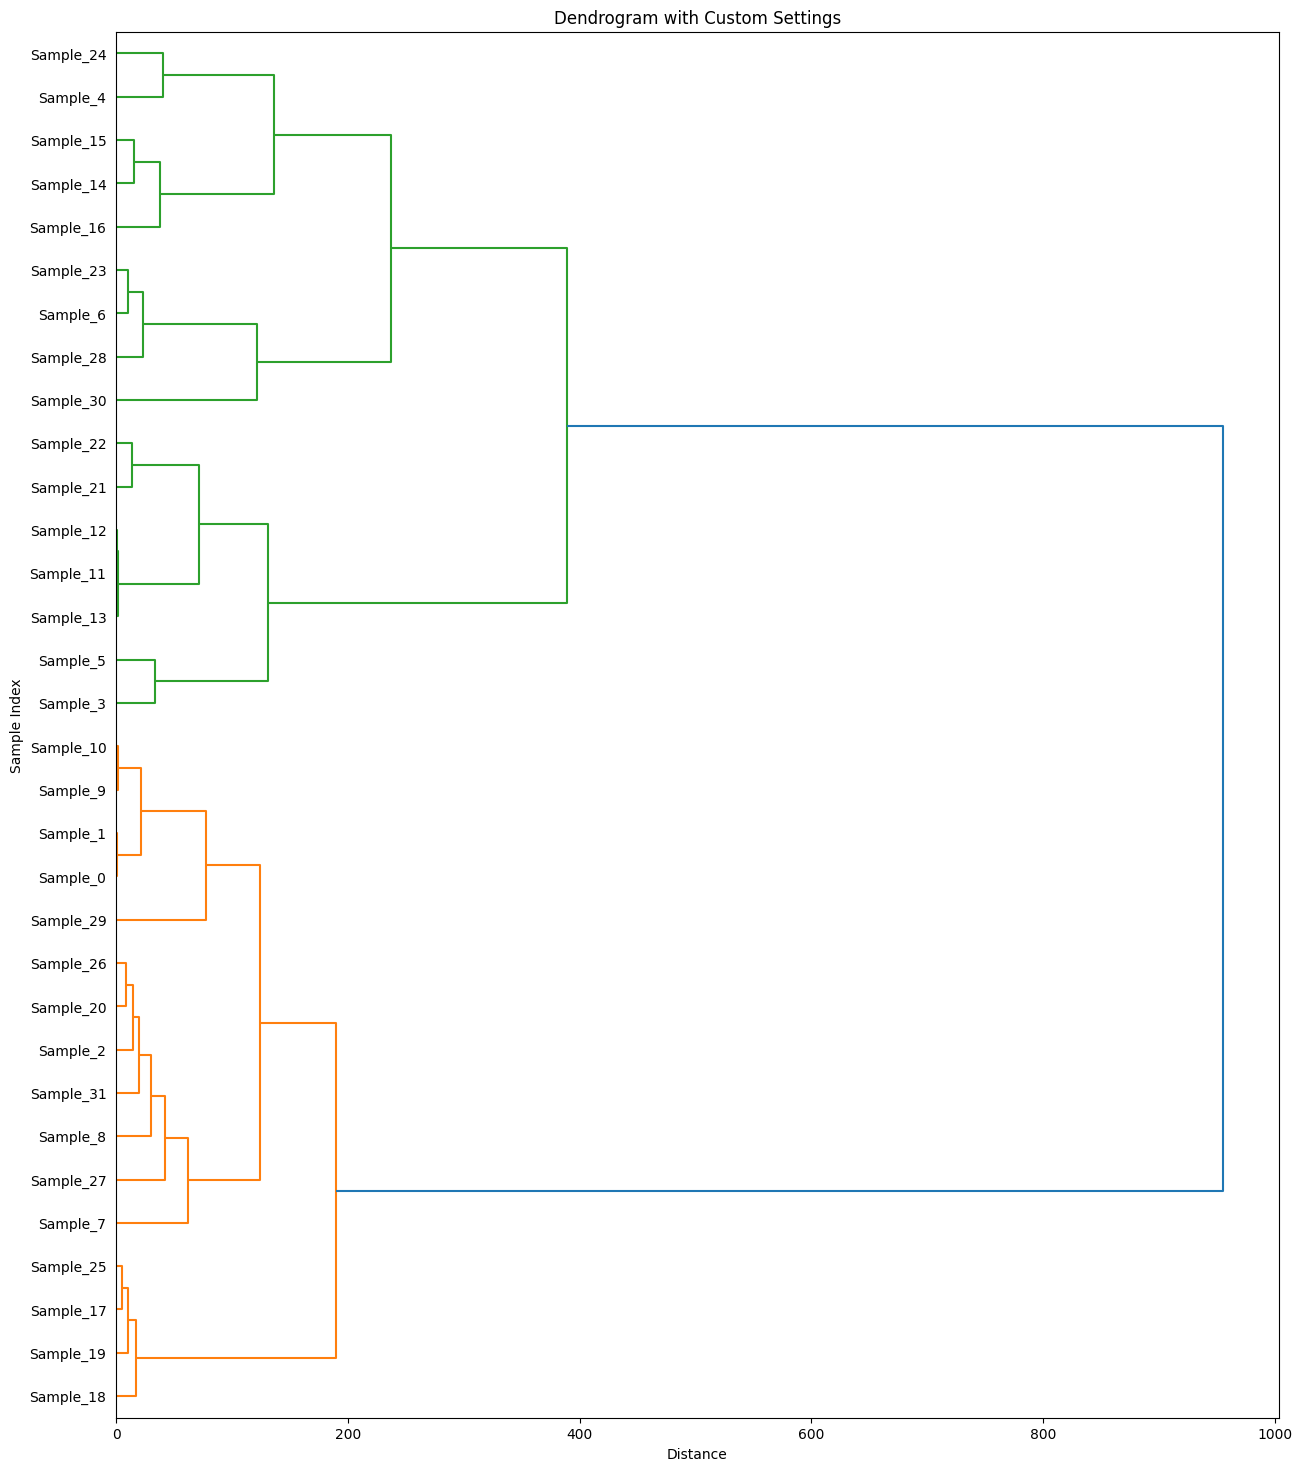

In [42]:
custom_labels = [f"Sample_{i}" for i in range(len(X))]  # Replace with your actual labels

# Generate the linkage matrix for hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram with custom labels
plt.figure(figsize=(15, 18))
dendrogram(Z, leaf_rotation=0, leaf_font_size=10, labels=custom_labels, orientation="right")
plt.title("Dendrogram with Custom Settings")
plt.xlabel("Distance")
plt.ylabel("Sample Index")
plt.show()



## 4. Visualization with Seaborn's ```clustermap```

The [seaborn](http://seaborn.pydata.org/index.html) plotting library for python can plot a [clustermap](http://seaborn.pydata.org/generated/seaborn.clustermap.html), which is a detailed dendrogram which also visualizes the dataset in more detail. It conducts the clustering as well, so we only need to pass it the dataset and the linkage type we want, and it will use scipy internally to conduct the clustering

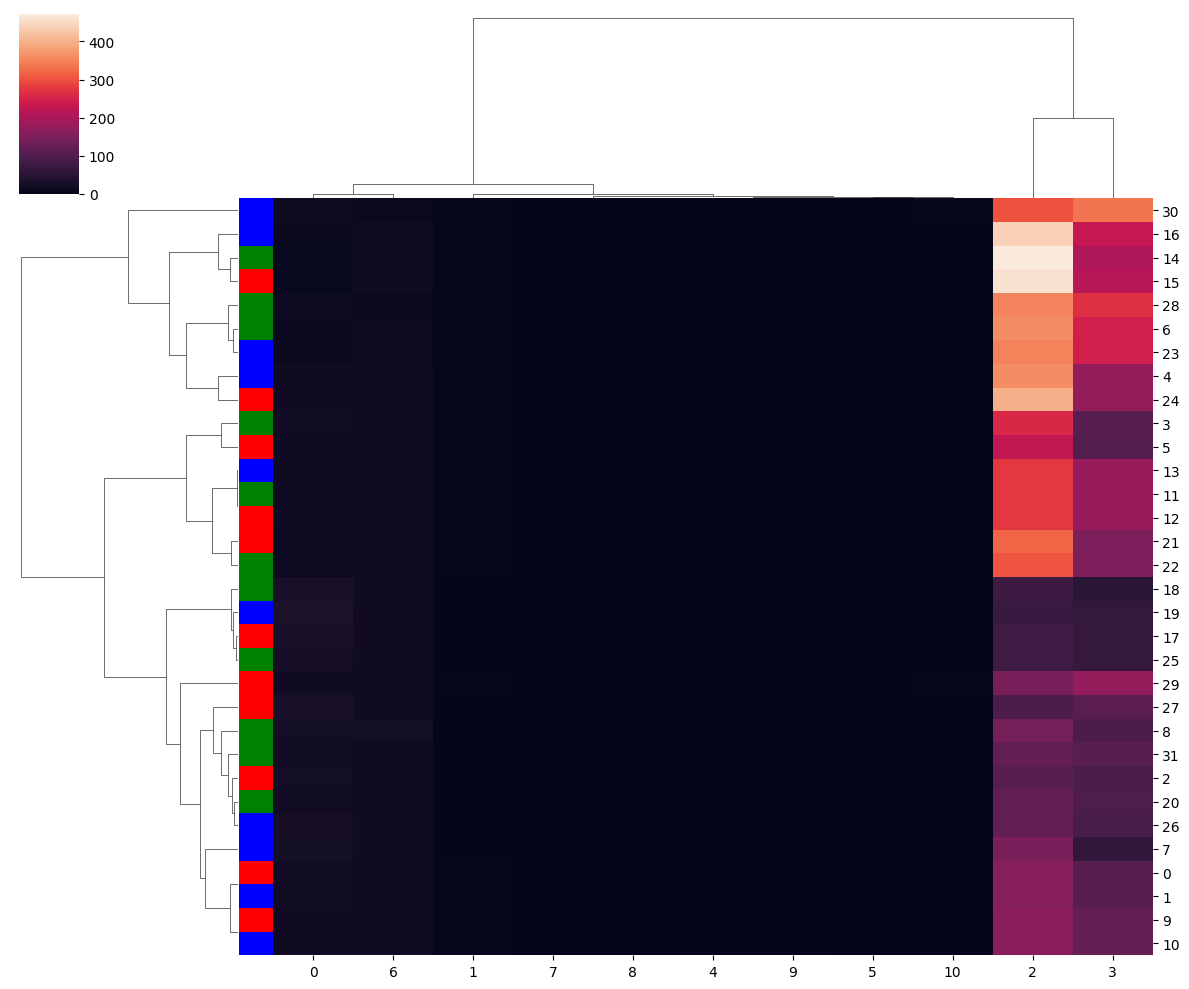

In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert Y to a pandas Series
Y_series = pd.Series(Y)

# Create the lookup table (lut) for colors
lut = dict(zip(Y_series.unique(), "rbg"))  # Ensure 'rbg' matches the number of unique labels in Y

# Map the colors to the labels in Y and convert to a NumPy array
row_colors = Y_series.map(lut).to_numpy()  # Convert to a non-indexed NumPy array

# Use seaborn's clustermap with the row_colors based on Y
sns.clustermap(X, row_colors=row_colors, figsize=(12, 10), method='complete')

# Show the plot
plt.show()



Looking at the colors of the dimensions can you observe how they different senators have voted. The bar on the extreme left shows the party they belong to. The plot on the whole shows which of the senators have voted, which have not and which of them have abstained.